# 자주 묻는 질문 FAQ

## Q1. Python과 R중 어떤 언어를 배워야 할까요?

In [1]:
#라이브러리
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [53]:
#데이터 가져오기
question = pd.read_csv('./data/schema.csv')
question.shape

(290, 3)

In [54]:
mcq = pd.read_csv('./data/multipleChoiceResponses.csv',encoding ='ISO-8859-1', low_memory = False)
mcq.shape

(16716, 228)

<AxesSubplot:xlabel='LanguageRecommendationSelect', ylabel='count'>

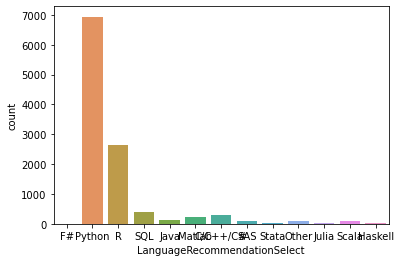

In [8]:
sns.countplot(x='LanguageRecommendationSelect',data=mcq)

파이썬을 명확하게 선호하고 있는 것으로 보여진다. 전문가와 강사들이 선호하는 언어를 알아보자

<AxesSubplot:xlabel='count', ylabel='CurrentJobTitleSelect'>

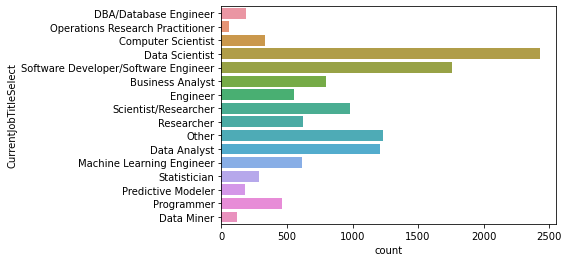

In [10]:
#현재 하고 있는 일
sns.countplot(y= mcq['CurrentJobTitleSelect'])

In [11]:
#현재 하고 있는 일에 대한 전체 응답수
mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape

(11830,)

<AxesSubplot:xlabel='count', ylabel='CurrentJobTitleSelect'>

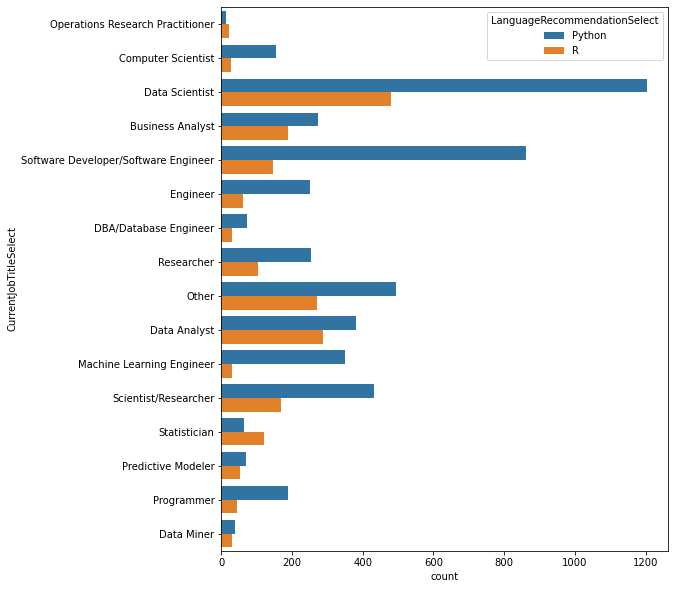

In [14]:
#현재 하고 있는일에 대한 응답을 해준 사람 중 python과 R을 사용하는 사람 구분
# 응답자들이 실제 업무에서 어떤 언어를 주로 사용하는지 볼 수 있다.

data = mcq[(mcq['CurrentJobTitleSelect'].notnull()) & (
            (mcq["LanguageRecommendationSelect"]=='Python')|
             (mcq['LanguageRecommendationSelect']=='R'))]
plt.figure(figsize= (8,10))
sns.countplot(y='CurrentJobTitleSelect',
             hue='LanguageRecommendationSelect',
             data= data)

데이터사이언티스트들은 Python을 주로 사용하지만 R을 사용하는 사람들도 있다. 하지만 소프트웨어 개발자들은 Python을 훨씬 더 많이 사용하며, Python보다 R을 더 많이 사용하는 직업군은 통계학자이다.

## Q2. 데이터 사이언스 분야에서 앞으로 크게 주목받을 것은 무엇일까요?

#### 데이터 사이언스 툴

In [25]:
mcq_ml_tool_counts = pd.DataFrame(
                mcq['MLToolNextYearSelect'].value_counts())
mcq_ml_tool_percent =pd.DataFrame(
                mcq['MLToolNextYearSelect'].value_counts(normalize=True)) 
mcq_ml_tool_df = mcq_ml_tool_counts.merge(
                    mcq_ml_tool_percent, right_index =True, left_index =True)
mcq_ml_tool_df.columns = ['응답수','비율']
mcq_ml_tool_df[:15]

,응답수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


<AxesSubplot:xlabel='MLToolNextYearSelect'>

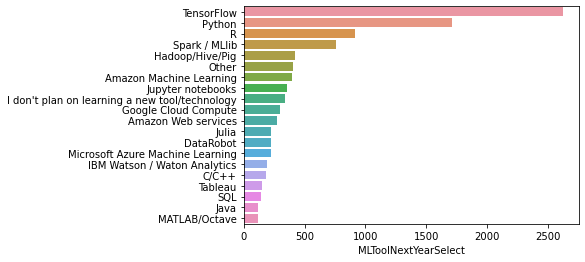

In [35]:
data= mcq['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(y=data.index,  x=data)

구글의 딥러닝 프레임워크 텐서플로우가 23%로 가장 많은 관심을 받을 것이라고 응답했다. 그리고 Python이 15% , R이 8%로 따르고 있다.

#### 다음해에 주목할 만한 Data Science Methods

<AxesSubplot:xlabel='MLMethodNextYearSelect'>

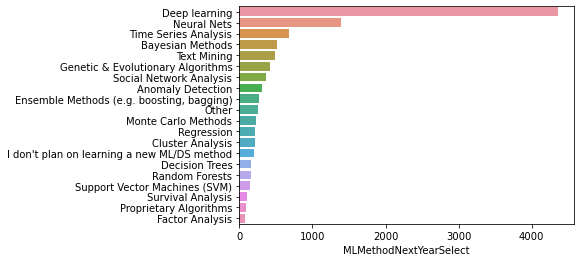

In [38]:
data =mcq['MLMethodNextYearSelect'].value_counts().head(20)
sns.barplot(y=data.index,x=data)

딥러닝과 뉴럴넷이 엄청나게 인기가 있을 것이고 시계열 분석, 베이지안등의 내용이 따르고 있다.

#### 어디서 데이터 사이언스를 배워야 할까?

In [55]:
mcq['LearningPlatfromSelect']= mcq['LearningPlatformSelect'].astype(str).apply(lambda x:x.split(','))
s =mcq.apply(
        lambda x :pd.Series(x['LearningPlatfromSelect']),
            axis =1).stack().reset_index(level=1 ,drop=True)
s.name = 'platform'

<AxesSubplot:xlabel='platform'>

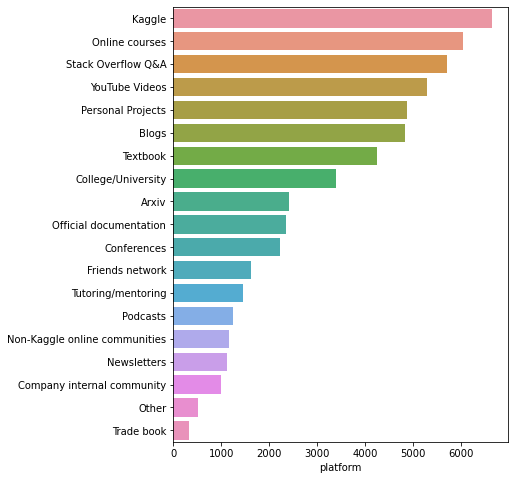

In [56]:
plt.figure(figsize = (6,8))
data = s[s!='nan'].value_counts().head(20)
sns.barplot(y=data.index, x=data)

 - Kaggel이 응답자들 사이에서 가장 인기있는 학습 플랫폼
 - 그러나 설문조사를 한 곳이 Kaggle이기 때문에 응답이 편향되어 있을 수 있다.
 - 온라인 콧, 스택 오버플로 및 유튜브는 대학 학위나 교과서의 중요도보다 높다.

In [61]:
#설문내용과 누구에게 물어봤는지 찾아봄
qc = question.loc[question[
    'Column'].str.contains('LearningCategory')]
print(qc.shape)
qc

(7, 3)


,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All


In [63]:
use_features = [x for x in mcq.columns if x.find(
            "LearningPlatformUsefulness")!=-1]

<AxesSubplot:>

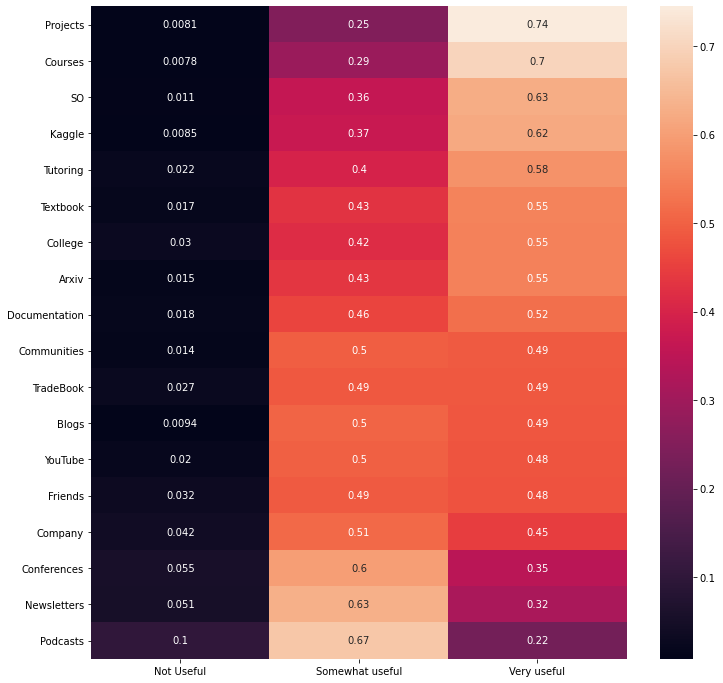

In [66]:
#학습플랫폼과 유용함에 대한 연관성을 살펴본다.
fdf={}
for feature in use_features :
    a = mcq[feature].value_counts()
    a = a/a.sum()
    fdf[feature[len('LearningPlatformUsefulness'):]] = a
    
fdf = pd.DataFrame(fdf).transpose().sort_values(
            'Very useful', ascending=False)

#학습플랫폼이 얼마나 유용한지에 대한 상관관계를 그려본다.

plt.figure(figsize=(12,12))
sns.heatmap(
        fdf.sort_values(
            'Very useful', ascending=False), annot=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Projects'),
  Text(1, 0, 'Courses'),
  Text(2, 0, 'SO'),
  Text(3, 0, 'Kaggle'),
  Text(4, 0, 'Tutoring'),
  Text(5, 0, 'Textbook'),
  Text(6, 0, 'College'),
  Text(7, 0, 'Arxiv'),
  Text(8, 0, 'Documentation'),
  Text(9, 0, 'Communities'),
  Text(10, 0, 'TradeBook'),
  Text(11, 0, 'Blogs'),
  Text(12, 0, 'YouTube'),
  Text(13, 0, 'Friends'),
  Text(14, 0, 'Company'),
  Text(15, 0, 'Conferences'),
  Text(16, 0, 'Newsletters'),
  Text(17, 0, 'Podcasts')])

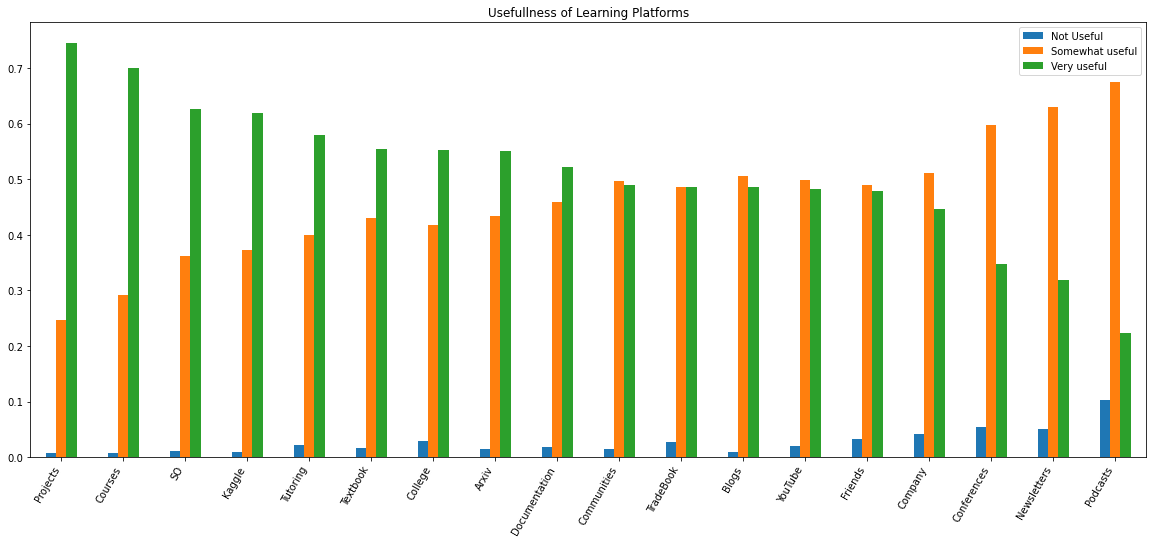

In [67]:
#유용함 정도를 각 플랫폼별로 그룹화 해서 본다.
fdf.plot(kind='bar', figsize=(20,8),
        title = 'Usefullness of Learning Platforms')
plt.xticks(rotation = 60, ha ='right')

실제로 프로젝트를 해보는것이 매우 유용하다고 나타났으며 스택오버플로우,캐글,수업과 책이 도움이 많이 되는편이라고 표시되었다.

In [68]:
cat_features =[x for x in mcq.columns if x.find(
            'LearningCategory') != -1]
cat_features

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

In [69]:
cdf = {}
for feature in cat_features :
    cdf[feature[len('LearningCategory'):]] = mcq[feature].mean()
    
#파이차트를 그리기 위해 평균 값을 구해와서 담아준다.
cdf = pd.Series(cdf)
cdf

SelftTaught      33.366771
OnlineCourses    27.375514
Work             15.217593
University       16.988607
Kaggle            5.531434
Other             1.795940
dtype: float64

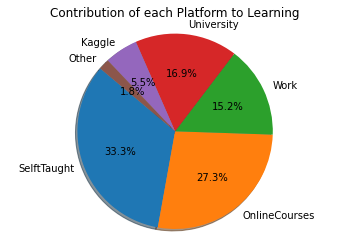

In [70]:
#학습 플랫폼 별 도움이 되는 정도를 그려본다.
plt.pie(cdf, labels =cdf.index,
           autopct='%1.1f%%',shadow=True, startangle=140)
plt.axis('equal')
plt.title('Contribution of each Platform to Learning')
plt.show()

개인 프로젝트를 해보는 것이 가장 많이 도움이 되었으며, 온라인코스와 대학, 업무 그다음 캐글을 통해 배웠다고 응답되었다.

#### Q4. 데이터과학을 위해 높은 사양의 컴퓨터가 필요한가?

In [71]:
qc = question.loc[question[
        'Column'].str.contains('HardwarePersonalProjectsSelect')]
print(qc.shape)
qc

(1, 3)


,Column,Question,Asked
74,HardwarePersonalProjectsSelect,Which computing hardware do you use for your p...,Learners


In [73]:
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()][
    "HardwarePersonalProjectsSelect"].shape

(4206,)

In [74]:
mcq['HardwarePersonalProjectsSelect'] = mcq['HardwarePersonalProjectsSelect'
                                           ].astype('str').apply(lambda x : x.split(','))
# str으로 바꾸고 lambda적용
s = mcq.apply(lambda x :
             pd.Series(x['HardwarePersonalProjectsSelect']),
             axis = 1).stack().reset_index(level=1, drop = True)
s.name ='hardware'

In [75]:
s = s[s!='nan']

In [76]:
pd.DataFrame(s.value_counts())

,hardware
Basic laptop (Macbook),2246
GCE ...),669
Laptop + Cloud service (AWS,669
Azure,669
Gaming Laptop (Laptop + CUDA capable GPU),641
Traditional Workstation,527
Laptop or Workstation and local IT supported servers,445
GPU accelerated Workstation,416
Workstation + Cloud service,174
Other,147


맥북을 사용하는 응답자가 가장 많다.

## Q5. 데이터 사이언스에 얼마나 많은 시간을 사용하는가?

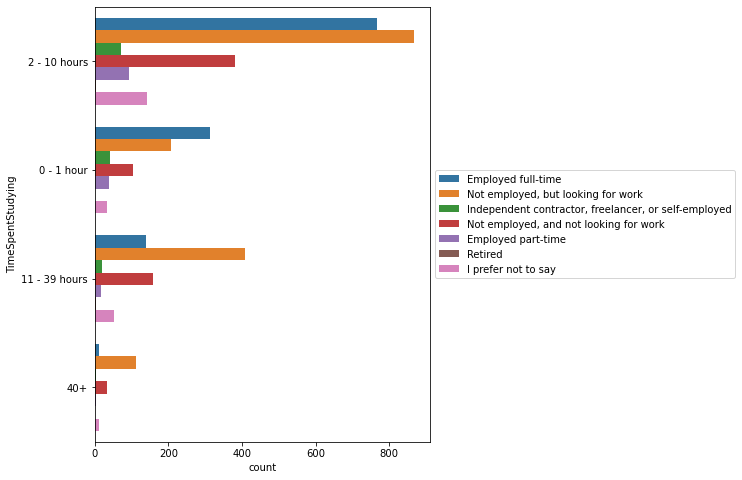

In [80]:
plt.figure(figsize=(6,8))
sns.countplot(y='TimeSpentStudying',
             data=mcq,
             hue='EmploymentStatus'
             ).legend(loc='center left',
                     bbox_to_anchor=(1,0.5))
## .legend(loc='center left',bbox_to_anchor(1,0.5)) => 바운딩 박스 밖에서 범주 박스 다루기

풀 타임으로 일하는 사람들은 2~10시간 일하는 비율이 높으며, 풀타임으로 일하는 사람보다 일을 찾고 있는 사람들이 더 많은 시간을 공부하는 편이다.
하지만 응답자 중 대부분이 풀타임으로 일하는 사람인 것을 고려할 필요가 있다.

In [82]:
full_time =mcq.loc[mcq['EmploymentStatus']=='Employed full-time']
print(full_time.shape)

looking_for_job= mcq.loc[
    mcq['EmploymentStatus']=='Not employed, but looking for work']
print(looking_for_job.shape)

(10897, 229)
(2110, 229)


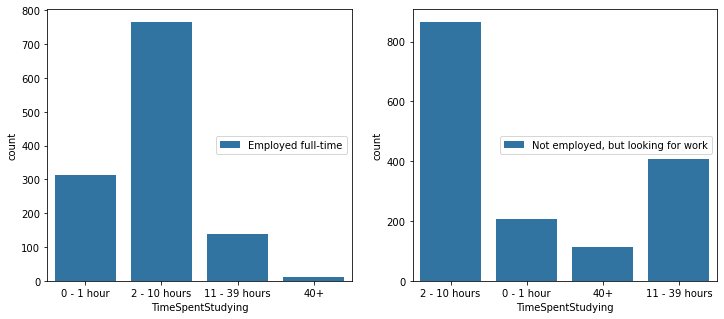

In [99]:
figure, (ax1,ax2)=plt.subplots(ncols =2)

figure.set_size_inches(12,5)
sns.countplot(x='TimeSpentStudying',
             data=full_time,
             hue='EmploymentStatus', ax =ax1
             ).legend(loc='center right',
                     bbox_to_anchor=(1,0.5))

sns.countplot(x='TimeSpentStudying',
             data=looking_for_job,
             hue='EmploymentStatus', ax=ax2
             ).legend(loc='center right',
                     bbox_to_anchor=(1,0.5))